In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
housing_train = pd.read_csv('/content/train.csv') # import training file
housing_test = pd.read_csv('/content/test.csv') # import test file
housing_train.head() # Print first 5 rows of dataframe

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [ ]:
housing_train.shape # This dataframe is 20500 rows x 25 columns

(20500, 25)

In [ ]:
housing_train.describe() # Get a view of some information about the data

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,12.945751,77.637280,0.226732,0.361463,0.174927,0.711512,1061.829463,5.770634,1.858146,4.553512,1.873561,3.801610,1.148976,19053.602195
std,0.029594,0.110586,0.418728,0.480436,0.379914,0.453070,591.419631,6.350271,0.710822,335.416267,2.184927,3.185748,0.993835,8433.949300
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918188,77.571956,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943800,77.633491,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970952,77.695760,0.000000,1.000000,0.000000,1.000000,1281.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [ ]:
housing_train.columns # Print out columns of the dataframe

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [ ]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

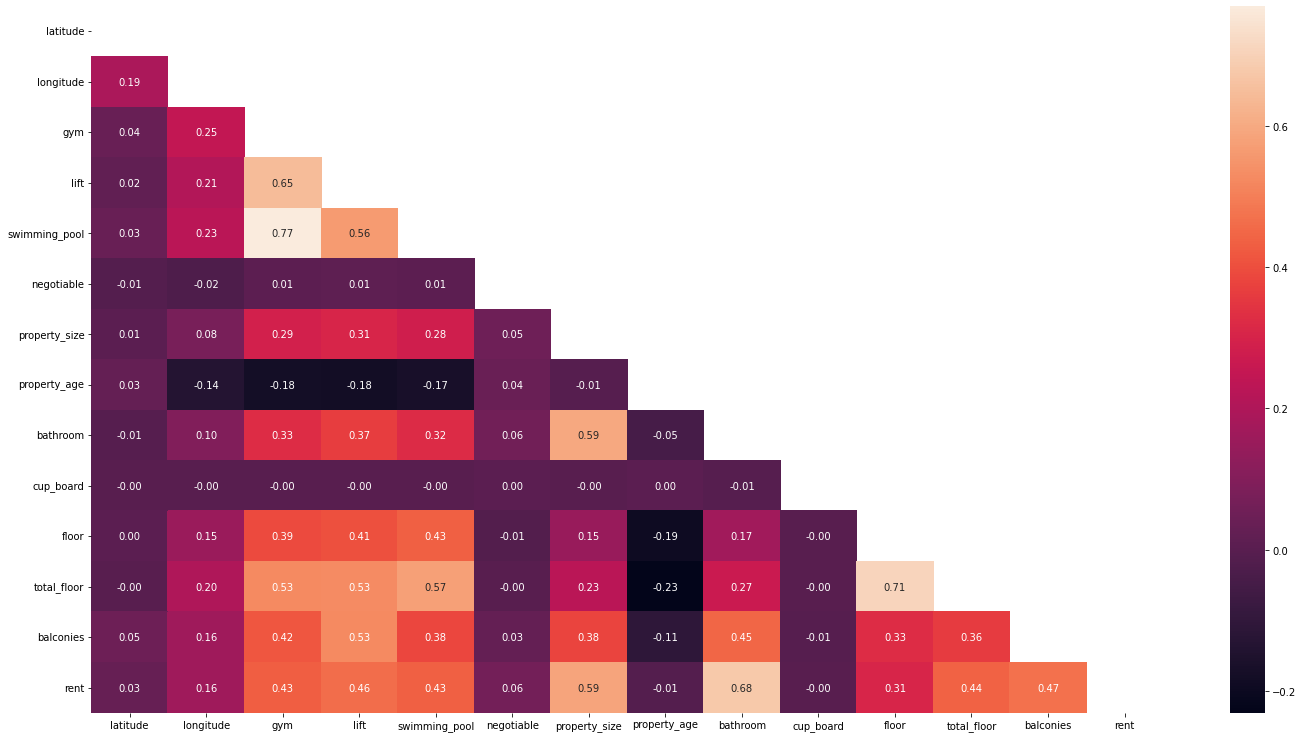

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning)

plt.figure(figsize=(24,13))

# mask is used to see only half heatmap i.e. lower or upper triangular part
d = housing_train.drop("id",axis=1)
corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)

In [ ]:
print(housing_train.corr().nlargest(24, 'rent')['rent'].index)
print(housing_train.corr().nlargest(24, 'rent')['rent'].values) 

print(housing_train.corr().nsmallest(5, 'rent')['rent'].index) 
print(housing_train.corr().nsmallest(5, 'rent')['rent'].values) 

Index(['rent', 'bathroom', 'property_size', 'balconies', 'lift', 'total_floor',
       'swimming_pool', 'gym', 'floor', 'longitude', 'negotiable', 'latitude',
       'cup_board', 'property_age'],
      dtype='object')
[ 1.          0.67751618  0.58842549  0.47240546  0.46260558  0.4374365
  0.43477603  0.43208127  0.30676886  0.1638641   0.06242997  0.03312966
 -0.00124728 -0.01078622]
Index(['property_age', 'cup_board', 'latitude', 'negotiable', 'longitude'], dtype='object')
[-0.01078622 -0.00124728  0.03312966  0.06242997  0.1638641 ]


In [ ]:
((housing_train.isnull().sum()/housing_train.isnull().count()).sort_values(ascending=False)) * 100
# Checking for null values

id                 0.0
property_size      0.0
balconies          0.0
building_type      0.0
water_supply       0.0
amenities          0.0
total_floor        0.0
floor              0.0
cup_board          0.0
facing             0.0
bathroom           0.0
property_age       0.0
parking            0.0
type               0.0
furnishing         0.0
negotiable         0.0
swimming_pool      0.0
lift               0.0
gym                0.0
lease_type         0.0
longitude          0.0
latitude           0.0
activation_date    0.0
locality           0.0
rent               0.0
dtype: float64

In [ ]:
features = ['latitude', 'longitude',
       'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom',
       'cup_board', 'floor', 'total_floor',
       'balconies']

X = housing_train[features] # Assigning X and y to prepare for the model creation
y = housing_train.rent

print(X.shape) # Verifying that X and y have the same amount of rows
print(y.shape)

(20500, 13)
(20500,)


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1) # Splitting data between training and test sets

model = RandomForestRegressor(random_state=1) # Defining the Random Forest model

model.fit(train_X, train_y) # Fitting the model to prepare it to be able to do its thing

pred = model.predict(test_X) # Make predictions with the model

# mae = mean_absolute_error(val_y, pred) # Compare actual values of SalePrice in the test data to the predictions that the model made
# print(mae)

pred.mean()

19179.709635772357

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_y, pred))

In [ ]:
rmse 

3921.202855957971

In [ ]:
import pickle
import warnings
warnings.resetwarnings()

warnings.simplefilter('ignore', UserWarning)

In [ ]:
# create an iterator object with write permission - model.pkl
with open('model_rent_p', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('model_rent_p' , 'rb') as f:
    lr = pickle.load(f)

In [ ]:
lr.predict([[12.94160313, 77.56815588, 0, 1, 0, 0, 1300, 1, 2, 2, 3, 3, 1]])

array([28990.])

In [ ]:
print('latitude', 'longitude',
       'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom',
       'cup_board', 'floor', 'total_floor',
       'balconies', sep=", ")

latitude, longitude, gym, lift, swimming_pool, negotiable, property_size, property_age, bathroom, cup_board, floor, total_floor, balconies


In [ ]:

def predict_rent(latitude, longitude, gym, lift, swimming_pool, negotiable, property_size, property_age, bathroom, cup_board, floor, total_floor, balconies):
  with open('model_rent_p' , 'rb') as f:
    lr = pickle.load(f)
    pr=lr.predict([[latitude, longitude, gym, lift, swimming_pool, negotiable, property_size, property_age, bathroom, cup_board, floor, total_floor, balconies]])
    return pr[0]

predict_rent(12.94160313, 77.56815588, 0, 1, 0, 0, 1300, 1, 2, 2, 3, 3, 1)

28990.0

In [87]:
submission = pd.concat([pd.Series(pred, name='rent')], axis=1)
submission

,rent
0,16400.00
1,9267.50
2,12330.00
3,20534.99
4,10310.00
...,...
5120,11970.00
5121,17745.00
5122,12605.00
5123,17560.00


In [88]:
submission.to_csv('./submission.csv', index=False, header=True)